In [155]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
background = Image.open("human_diagram.png")

# Coordinates (hard coded)
coordinates = [(218, 1100), (672, 563), (389, 510), (554, 170), (497, 75), (613, 1279), (545, 775), (500, 890), (423, 687), (873, 1054), (430, 980), (823, 864)]

organs = ['Adipose Subcutenous', 'Artery Aorta', 'Artery Coronary', 'Brain Cerebellum', 'Brain Cortex', 'Colon Sigmoid', 'Heart', 'Liver', 'Lung', 'Nerve', 'Pancreas', 'Skin']

data = pd.read_csv('avg_agegaps.csv')
z_scores_columns = data.columns[1:]

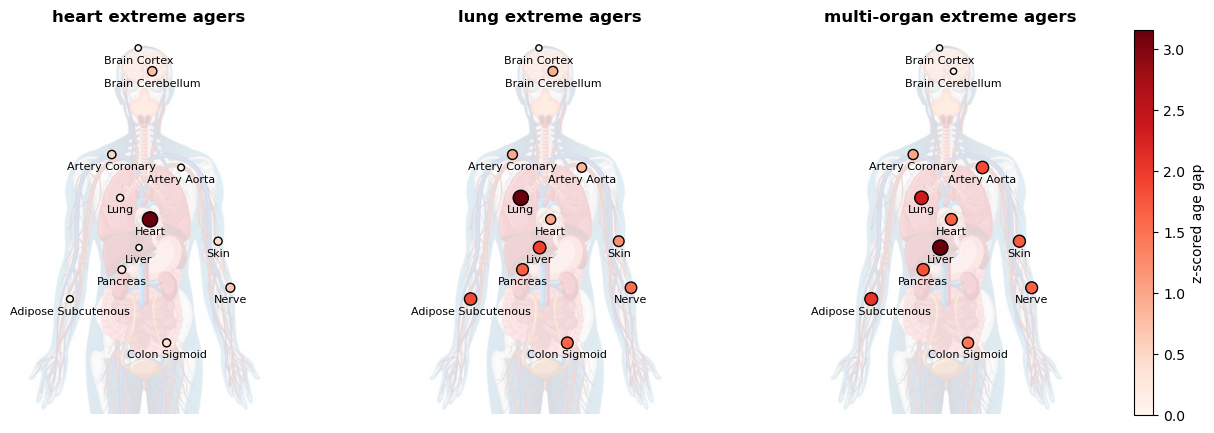

In [157]:
fig, axes = plt.subplots(1, len(z_scores_columns), figsize=(15, 5))

for ax, column in zip(axes, z_scores_columns):
    z_scores = data[column].values
    ax.imshow(background, alpha=0.2)
    point_sizes = 20 +(z_scores - np.min(z_scores)) / (np.max(z_scores) - np.min(z_scores)) * 100
    scatter = ax.scatter(
        [x for x, y in coordinates],
        [y for x, y in coordinates],
        c=z_scores,
        cmap='Reds',
        s=point_sizes,
        edgecolor='black'
    )
    for (x, y), organ in zip(coordinates, organs):
        ax.text(x, y + 60, f"{organ}", ha='center', fontsize=8, color='black')
    ax.set_title(column, fontsize=12, weight='bold')
    ax.axis('off')

cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label("z-scored age gap")

fig.subplots_adjust(wspace=0.4, hspace=0.4, right=0.85)
plt.savefig('extreme_agers_antomogram.png')
plt.show()
